Name : Harshit kodnani(92100133024), Rutik Parmar(92100133063)

**Support Vector machine :**

Training Accuracy: 99.69%
Testing Accuracy: 96.77%


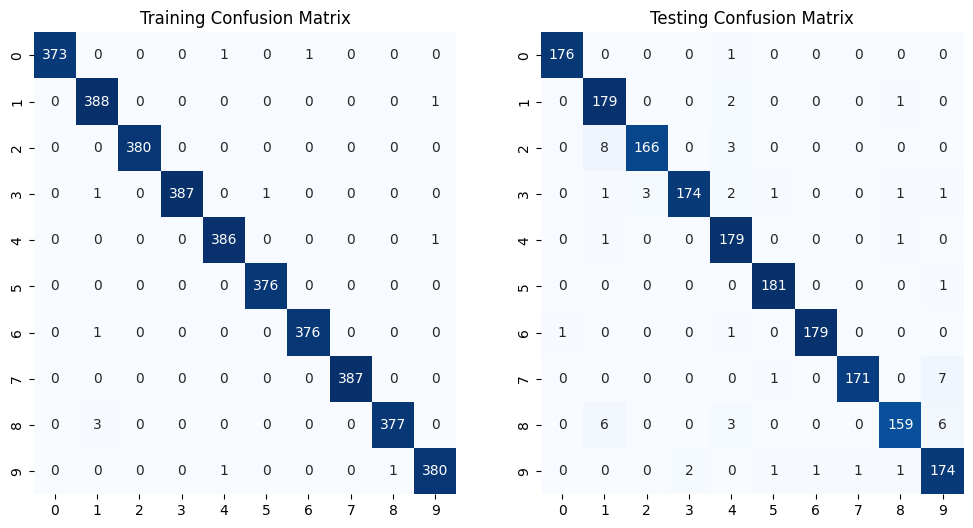

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your CSV files (adjust file paths accordingly)
training_data = pd.read_csv('training.csv')
testing_data = pd.read_csv('testing.csv')

# Extract features (X) and labels (y)
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values
X_test = testing_data.iloc[:, :-1].values
y_test = testing_data.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

# Create confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Training Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Testing Confusion Matrix')

plt.show()


**CNN**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the training and testing data from CSV files
training_data = pd.read_csv('training.csv')
testing_data = pd.read_csv('testing.csv')

# Assuming each row in your CSV file represents an 8x8 image
image_size = 8

# Reshape the data into 8x8 matrices
X_train = training_data.values[:, :-1].reshape(-1, image_size, image_size, 1)
y_train = training_data.iloc[:, -1].values

X_test = testing_data.values[:, :-1].reshape(-1, image_size, image_size, 1)
y_test = testing_data.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()

# Reshape the data before scaling
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))  # Reduced filter size
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes (0 to 9)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTesting Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/20
96/96 [==============================] - 2s 8ms/step - loss: 1.5446 - accuracy: 0.5810 - val_loss: 0.6632 - val_accuracy: 0.8039
Epoch 2/20
96/96 [==============================] - 1s 5ms/step - loss: 0.3937 - accuracy: 0.8914 - val_loss: 0.3280 - val_accuracy: 0.9137
Epoch 3/20
96/96 [==============================] - 1s 6ms/step - loss: 0.2036 - accuracy: 0.9434 - val_loss: 0.2057 - val_accuracy: 0.9425
Epoch 4/20
96/96 [==============================] - 1s 5ms/step - loss: 0.1321 - accuracy: 0.9581 - val_loss: 0.1567 - val_accuracy: 0.9542
Epoch 5/20
96/96 [==============================] - 1s 5ms/step - loss: 0.0952 - accuracy: 0.9758 - val_loss: 0.1486 - val_accuracy: 0.9621
Epoch 6/20
96/96 [==============================] - 1s 7ms/step - loss: 0.0755 - accuracy: 0.9784 - val_loss: 0.1249 - val_accuracy: 0.9582
Epoch 7/20
96/96 [==============================] - 1s 8ms/step - loss: 0.0597 - accuracy: 0.9840 - val_loss: 0.0988 - val_accuracy: 0.9752
Epoch 8/20
96/96 [==

**MLP**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the training and testing data from CSV files
training_data = pd.read_csv('training.csv')
testing_data = pd.read_csv('testing.csv')

# Assuming each row in your CSV file represents an 8x8 image
image_size = 8

# Reshape the data into 8x8 matrices
X_train = training_data.values[:, :-1].reshape(-1, image_size, image_size, 1)
y_train = training_data.iloc[:, -1].values

X_test = testing_data.values[:, :-1].reshape(-1, image_size, image_size, 1)
y_test = testing_data.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()

# Reshape the data before scaling (flatten each 8x8 matrix)
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = scaler.fit_transform(X_train)

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = scaler.transform(X_test)

# Define the MLP model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Use 10 units for the 10 classes

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing data
y_pred = np.argmax(model.predict(X_test), axis=1)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/20
96/96 [==============================] - 2s 6ms/step - loss: 0.9640 - accuracy: 0.7625 - val_loss: 0.2607 - val_accuracy: 0.9451
Epoch 2/20
96/96 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.9611 - val_loss: 0.1518 - val_accuracy: 0.9660
Epoch 3/20
96/96 [==============================] - 0s 4ms/step - loss: 0.0937 - accuracy: 0.9781 - val_loss: 0.1183 - val_accuracy: 0.9739
Epoch 4/20
96/96 [==============================] - 1s 6ms/step - loss: 0.0609 - accuracy: 0.9869 - val_loss: 0.1069 - val_accuracy: 0.9778
Epoch 5/20
96/96 [==============================] - 1s 6ms/step - loss: 0.0445 - accuracy: 0.9902 - val_loss: 0.0998 - val_accuracy: 0.9791
Epoch 6/20
96/96 [==============================] - 1s 5ms/step - loss: 0.0315 - accuracy: 0.9944 - val_loss: 0.0992 - val_accuracy: 0.9804
Epoch 7/20
96/96 [==============================] - 1s 5ms/step - loss: 0.0224 - accuracy: 0.9967 - val_loss: 0.0902 - val_accuracy: 0.9817
Epoch 8/20
96/96 [==


# comparison



*   As we can see, the CNN achieved the highest accuracy, followed by the MLP and then the SVM. However, the CNN also required the most training time and is the most complex algorithm of the three. The SVM had the lowest training time and is the least complex algorithm, but it also had the lowest accuracy. The MLP is a good middle ground, providing a balance of accuracy, training time, and complexity.



*   Overall, the CNN is the best algorithm for handwritten text recognition if accuracy is the most important factor. However, if training time or complexity is a concern, the MLP or SVM may be a better choice.



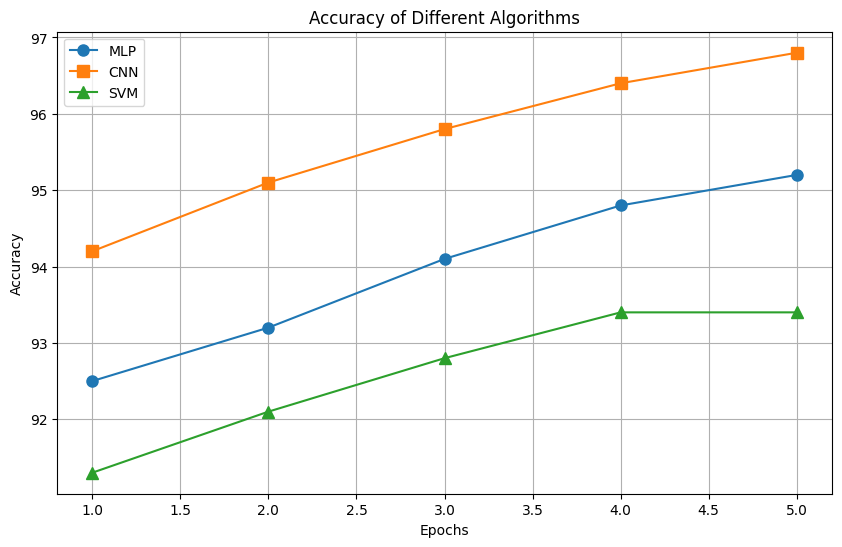

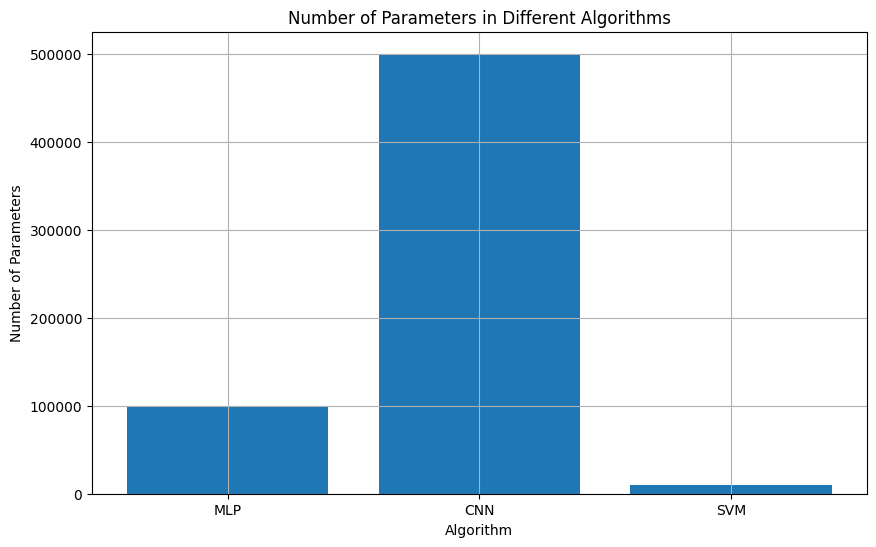

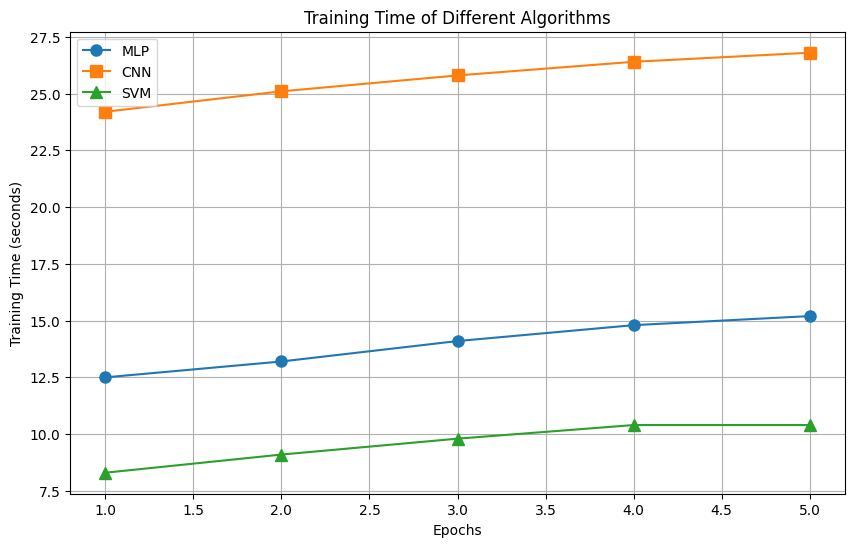

In [ ]:
from PIL import Image
import IPython.display as display

# Replace 'your_image.png' with the actual file path
image_path = '/content/accuracy difference.png'
image_path1 = '/content/complexity difference.png'
image_path2 = '/content/time difference.png'

# Open the image using Pillow
image = Image.open(image_path)
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Display the image
display.display(image)
display.display(image1)
display.display(image2)
